In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

In [2]:
df=pd.read_csv("mouse_viral_study.csv")

In [3]:
df

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [5]:
df.describe()

,Med_1_mL,Med_2_mL,Virus Present
count,400.000000,400.000000,400.000000
mean,5.447984,5.616750,0.500000
std,2.319059,2.336637,0.500626
min,1.000000,1.000000,0.000000
25%,3.249062,3.431311,0.000000
50%,5.393776,5.638471,0.500000
75%,7.630389,7.782614,1.000000
max,10.000000,10.000000,1.000000


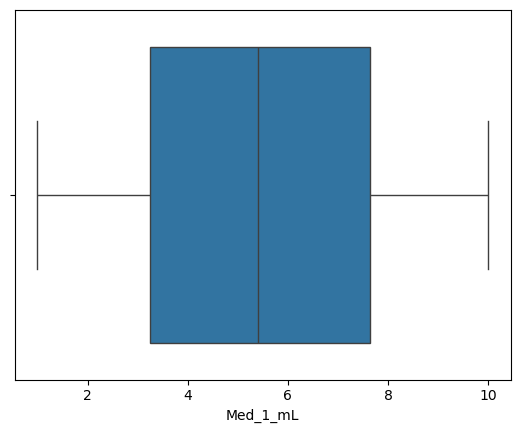

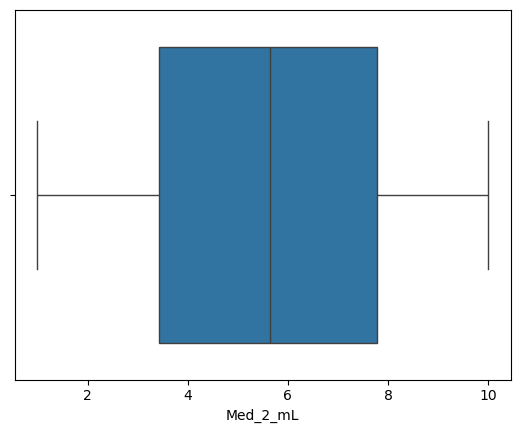

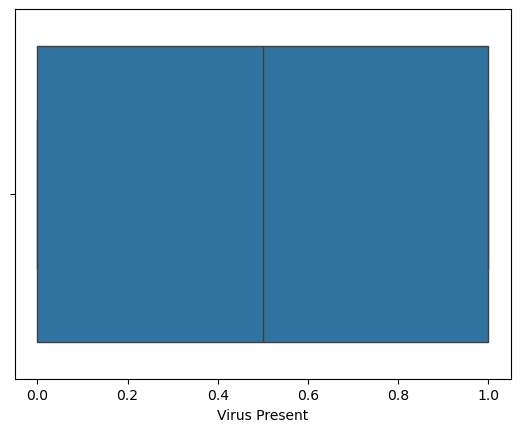

In [6]:
for i in (df.select_dtypes(['int','float'])):
    sns.boxplot(x=i,data=df)
    plt.show()

In [7]:
df

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


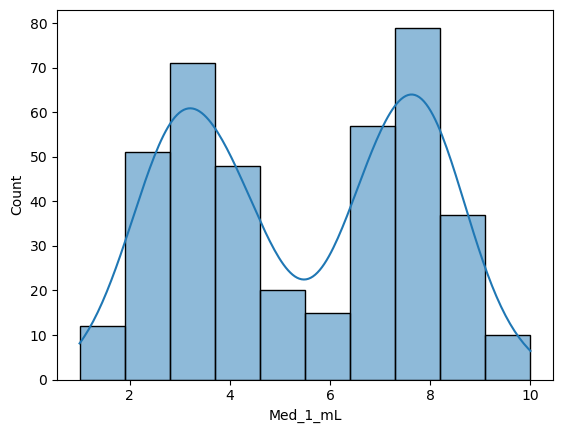

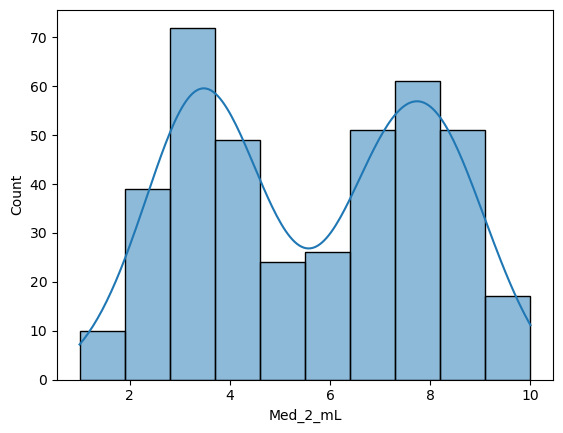

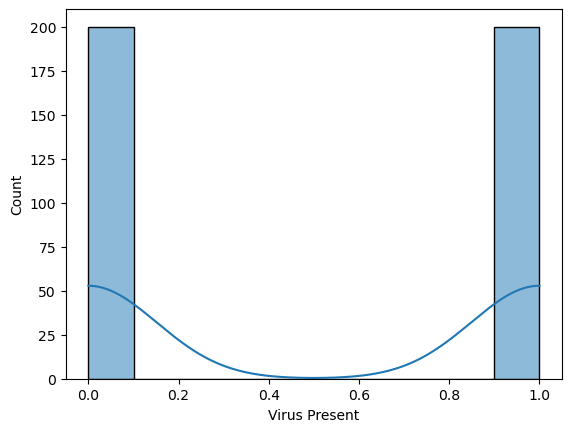

In [8]:
for i in (df.select_dtypes(['int','float'])):
    sns.histplot(x=i,data=df,kde=True)
    plt.show()

In [11]:
df.columns

Index(['Med_1_mL', 'Med_2_mL', 'Virus Present'], dtype='object')

In [12]:
x=df[['Med_1_mL', 'Med_2_mL']]
y=df['Virus Present']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [14]:
x_train.shape

(320, 2)

In [15]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
x_train=minmax.fit_transform(x_train)
x_test=minmax.transform(x_test)

In [18]:
for k in['linear','poly','rbf','sigmoid']:
    model=SVC(kernel=k)
    model.fit(x_train,y_train)
print(k,model.score(x_test,y_test))    

sigmoid 0.0


In [19]:
for k in ['linear','poly','rbf','sigmoid']:
    model=SVC(kernel=k)
    model.fit(x_train,y_train)
print(k,model.score(x_test,y_test))  

sigmoid 0.0


In [21]:
for k in ['linear', 'rbf', 'poly', 'sigmoid']:
    model = SVC(kernel=k)
    model.fit(x_train, y_train)
    print(k, "->", model.score(x_test, y_test))


linear -> 1.0
rbf -> 1.0
poly -> 1.0
sigmoid -> 0.0
